In [18]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [49]:
import pandas as pd
import numpy as np

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
amp_genes = pd.read_csv('../data/reduced_high_amp_genes.tsv', sep='\t')

In [3]:
del_genes = pd.read_csv('../data/reduced_high_del_genes.tsv', sep='\t')

In [4]:
all_genes = pd.concat([amp_genes, del_genes])

In [19]:
hgnc = pd.read_csv('../data/hgnc.txt', sep='\t', names=['family_id','family_name','symbol','gene_id'])

In [21]:
ag = pd.merge(all_genes, hgnc[['family_id','gene_id']], how='left', on='gene_id')

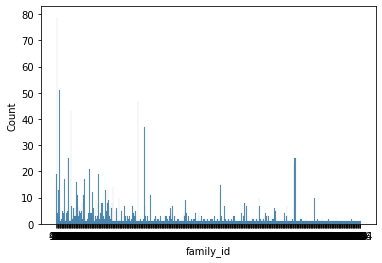

In [23]:
sns.histplot(data = ag.dropna(), x='family_id' )

In [28]:
ag['family_id'].value_counts()

26      79
139     51
140     47
28      43
141     37
        ..
1606     1
1493     1
1269     1
60       1
558      1
Name: family_id, Length: 479, dtype: int64

In [30]:
family = ag['family_id'].value_counts().rename_axis('family_id').reset_index(name='counts')

In [48]:
pd.merge(family[family['counts']>10], hgnc[['family_id','family_name']].drop_duplicates(), how='left', on='family_id')

,family_id,counts,expected,family_name
0,26,79,60.859008,Zinc fingers
1,139,51,53.666217,G protein-coupled receptors
2,140,47,46.193706,"G protein-coupled receptors, Class A rhodopsin..."
3,28,43,28.731206,Zinc fingers C2H2-type
4,141,37,34.485439,Olfactory receptors
5,886,25,8.391590,Immunoglobulin heavy
6,1691,25,33.806120,MicroRNA protein coding host genes
7,348,25,16.463501,Immunoglobulins
8,1690,25,37.002916,MicroRNA host genes
9,349,23,6.953032,Immunoglobulin heavy locus at 14q32.33


In [36]:
hgnc.loc[hgnc['family_id'] == '26', 'gene_id'].unique().shape

(1523,)

In [62]:
total_feat = 918
total_gene = 22973
expected = []
p_value = []
for index, row in family.iterrows():
    fid = row['family_id']
    count = row['counts']
    rate = hgnc.loc[hgnc['family_id'] == fid, 'gene_id'].unique().shape[0]/total_gene
    expected.append(rate * total_feat)
    
    p_value.append(stats.binom_test(count, total_feat, p=rate))

In [63]:
family['expected'] = expected
family['p_value'] = p_value

In [69]:
pd.merge(family[(family['counts']>5) & (family['p_value']<0.05)] , hgnc[['family_id','family_name']].drop_duplicates(), how='left', on='family_id')

,family_id,counts,expected,p_value,family_name
0,26,79,60.859008,0.019993,Zinc fingers
1,28,43,28.731206,0.010151,Zinc fingers C2H2-type
2,886,25,8.391590,0.000002,Immunoglobulin heavy
3,348,25,16.463501,0.044893,Immunoglobulins
4,1690,25,37.002916,0.043601,MicroRNA host genes
5,349,23,6.953032,0.000001,Immunoglobulin heavy locus at 14q32.33
6,424,17,8.511470,0.008299,Glycosyltransferases
7,517,15,4.755234,0.000126,ANTP class homeoboxes
8,518,12,2.077918,0.000002,HOXL subclass homeoboxes
9,59,11,3.796196,0.001865,Tripartite motif containing


In [74]:
amp = pd.merge(amp_genes, hgnc[['family_id','gene_id']], how='left', on='gene_id')
family = amp['family_id'].value_counts().rename_axis('family_id').reset_index(name='counts')

In [75]:
total_feat = 750
total_gene = 22973
expected = []
p_value = []
for index, row in family.iterrows():
    fid = row['family_id']
    count = row['counts']
    rate = hgnc.loc[hgnc['family_id'] == fid, 'gene_id'].unique().shape[0]/total_gene
    expected.append(rate * total_feat)
    
    p_value.append(stats.binom_test(count, total_feat, p=rate))
    
family['expected'] = expected
family['p_value'] = p_value
pd.merge(family[(family['counts']>5) & (family['p_value']<0.05)] , hgnc[['family_id','family_name']].drop_duplicates(), how='left', on='family_id')

,family_id,counts,expected,p_value,family_name
0,28,34,23.473208,3.501938e-02,Zinc fingers C2H2-type
1,349,23,5.680582,3.181976e-08,Immunoglobulin heavy locus at 14q32.33
2,348,23,13.450572,1.289665e-02,Immunoglobulins
3,886,23,6.855874,8.116179e-07,Immunoglobulin heavy
4,424,13,6.953815,3.262031e-02,Glycosyltransferases
5,59,11,3.101467,3.705120e-04,Tripartite motif containing
6,619,10,3.623819,4.107303e-03,Keratin associated proteins
7,165,10,1.599704,6.834308e-06,"Olfactory receptors, family 52"
8,1650,8,2.905585,9.839837e-03,Glycoside hydrolases
9,164,7,1.436469,7.095401e-04,"Olfactory receptors, family 51"


In [76]:
dell = pd.merge(del_genes, hgnc[['family_id','gene_id']], how='left', on='gene_id')
family = dell['family_id'].value_counts().rename_axis('family_id').reset_index(name='counts')

In [82]:
total_feat = 177
total_gene = 22973
expected = []
p_value = []
for index, row in family.iterrows():
    fid = row['family_id']
    count = row['counts']
    rate = hgnc.loc[hgnc['family_id'] == fid, 'gene_id'].unique().shape[0]/total_gene
    expected.append(rate * total_feat)
    
    p_value.append(stats.binom_test(count, total_feat, p=rate))
    
family['expected'] = expected
family['p_value'] = p_value
pd.merge(family[(family['counts']>5) & (family['p_value']<0.05)] , hgnc[['family_id','family_name']].drop_duplicates(), how='left', on='family_id')

,family_id,counts,expected,p_value,family_name
0,516,8,2.573369,0.004667,Homeoboxes
1,517,7,0.916859,0.000044,ANTP class homeoboxes


In [92]:
dell[dell['family_id']=='518']

,gene_id,name,chr,start,end,symbol,band,family_id
267,ENSG00000120094,q21.32,17,48528526,48531011,HOXB1,17q21.32,518
270,ENSG00000120075,q21.32,17,48591257,48593961,HOXB5,17q21.32,518
273,ENSG00000108511,q21.32,17,48595751,48604992,HOXB6,17q21.32,518
276,ENSG00000120068,q21.32,17,48611377,48615292,HOXB8,17q21.32,518
279,ENSG00000170689,q21.32,17,48621156,48626358,HOXB9,17q21.32,518


In [103]:
amp[amp['family_id']=='607']

,gene_id,name,chr,start,end,symbol,band,family_id
1075,ENSG00000185479,q13.13,12,52446651,52452146,KRT6B,12q13.13,607
1078,ENSG00000205420,q13.13,12,52487176,52493257,KRT6A,12q13.13,607
1081,ENSG00000139648,q13.13,12,52543909,52553145,KRT71,12q13.13,607
1084,ENSG00000189182,q13.13,12,52689626,52703524,KRT77,12q13.13,607
1087,ENSG00000111057,q13.13,12,52948871,52952906,KRT18,12q13.13,607
1410,ENSG00000125864,p12.1,20,17493905,17569220,BFSP1,20p12.1,607


In [ ]:
stats.binom_test(count, total_feat, p=rate)

In [104]:
all_genes.shape

(927, 7)